# Setup

In [1]:
# import dependencies
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# custom functions
from functions import clean_text, print_metrics, plot_confusion_matrix

[nltk_data] Downloading package stopwords to /Users/steve/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/steve/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# set seed
np.random.seed(42)

In [3]:
# load & clean data 
train = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/original-data/Constraint_Train.csv', header=0)
train_clean = train[train["tweet"].map(len) <= 280].drop_duplicates() # drop posts longer than 280 characters & drop duplicates
X_train, y_train = train_clean["tweet"], train_clean["label"]


val = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/original-data/Constraint_Val.csv', header=0)
val_clean = val[val["tweet"].map(len) <= 280].drop_duplicates()  # drop posts longer than 280 characters & drop duplicates
X_val, y_val = val_clean["tweet"], val_clean["label"]

test = pd.read_csv('https://raw.githubusercontent.com/smkerr/COVID-fake-news-detection/main/data/original-data/Constraint_Test.csv', header=0)
test_clean = test[test["tweet"].map(len) <= 280].drop_duplicates()  # drop posts longer than 280 characters & drop duplicates
X_test, y_test = test_clean["tweet"], test_clean["label"]

# Pre-processing

In [4]:
# apply clean_text() function to all tweets 
X_train = X_train.map(lambda x: clean_text(x))
X_val = X_val.map(lambda x: clean_text(x))
X_test = X_test.map(lambda x: clean_text(x))

In [5]:
# initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# encode 'fake' as 0 and 'real' as 1 to make target variables machine-readable
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.fit_transform(y_val)
y_test = label_encoder.fit_transform(y_test)

# Model Training

## #1 SVM

In [6]:
# create SVM object
svm_clf = LinearSVC()

# create pipeline
svm_pipeline = Pipeline([
        ('bow', CountVectorizer()), # count term frequency
        ('tfidf', TfidfTransformer()), # downweight words which appear frequently
        ('c', svm_clf) # classifier
])

# train model
fit = svm_pipeline.fit(X_train,y_train)

# make predictions
svm_pred_val = svm_pipeline.predict(X_val) # validation set 
svm_pred_test = svm_pipeline.predict(X_test) # test set 

## #2 Logistic Regression

In [7]:
# create logistic regression object
lr_clf = LogisticRegression()

# create pipeline
lr_pipeline = Pipeline([
        ('count', CountVectorizer()), # count term frequency
        ('tfidf', TfidfTransformer()), # downweight words which appear frequently
        ('c', lr_clf) # classifier
])

# train model
fit = lr_pipeline.fit(X_train,y_train)

# make predictions
lr_pred_val = lr_pipeline.predict(X_val) # validation set 
lr_pred_test = lr_pipeline.predict(X_test) # test set 

## #3 Gradient Boosting

In [8]:
# create Gradient Boosting object 
gb_clf = GradientBoostingClassifier()

# create pipeline
gb_pipeline = Pipeline([
        ('bow', CountVectorizer()), # count term frequency
        ('tfidf', TfidfTransformer()), # downweight words which appear frequently
        ('c', gb_clf) # classifier
])

# train model 
fit = gb_pipeline.fit(X_train,y_train)

# make predictions
gb_pred_val = gb_pipeline.predict(X_val) # validation set 
gb_pred_test = gb_pipeline.predict(X_test) # test set 

## #4 Decision Tree

In [9]:
# create decision tree object 
dt_clf = tree.DecisionTreeClassifier()

# create pipeline
dt_pipeline = Pipeline([
        ('bow', CountVectorizer()), # count term frequency
        ('tfidf', TfidfTransformer()), # downweight words which appear frequently
        ('c', dt_clf) # classifier
])

# train model 
fit = dt_pipeline.fit(X_train,y_train)

# make predictions
dt_pred_val = dt_pipeline.predict(X_val) # validation set 
dt_pred_test = dt_pipeline.predict(X_test) # test set 

# Evaluation

## #1 SVM

[[892  56]
 [ 75 850]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       948
           1       0.94      0.92      0.93       925

    accuracy                           0.93      1873
   macro avg       0.93      0.93      0.93      1873
weighted avg       0.93      0.93      0.93      1873

Accuracy :  0.9300587293112653
Precison :  0.9302819955533062
Recall :  0.9300587293112653
F1 :  0.9300746469735766


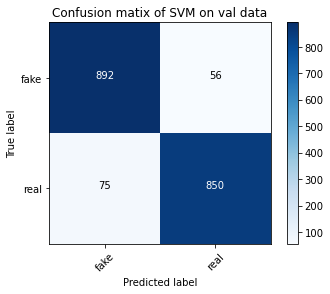

In [10]:
# validation set
# display results
print_metrics(svm_pred_val,y_val)
plot_confusion_matrix(confusion_matrix(y_val,svm_pred_val),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on val data')

[[887  57]
 [ 76 828]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       944
           1       0.94      0.92      0.93       904

    accuracy                           0.93      1848
   macro avg       0.93      0.93      0.93      1848
weighted avg       0.93      0.93      0.93      1848

Accuracy :  0.928030303030303
Precison :  0.9282738632954716
Recall :  0.928030303030303
F1 :  0.928053951021392


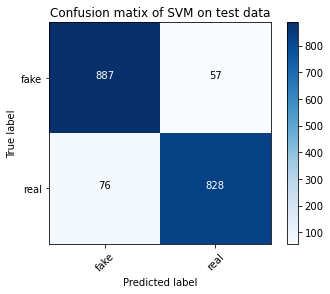

In [11]:
# test set
# display results
print_metrics(svm_pred_test,y_test)
plot_confusion_matrix(confusion_matrix(y_test,svm_pred_test),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on test data')

## #2 Logistic Regression

[[894  54]
 [102 823]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       948
           1       0.94      0.89      0.91       925

    accuracy                           0.92      1873
   macro avg       0.92      0.92      0.92      1873
weighted avg       0.92      0.92      0.92      1873

Accuracy :  0.9167111585691404
Precison :  0.9180773068648068
Recall :  0.9167111585691404
F1 :  0.9167921866139958


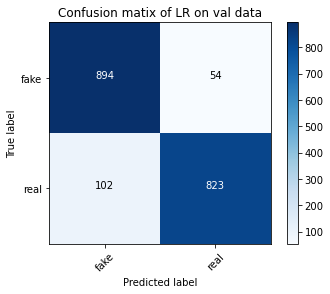

In [12]:
# validation set
# display results
print_metrics(lr_pred_val,y_val)
plot_confusion_matrix(confusion_matrix(y_val,lr_pred_val),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of LR on val data')

[[896  48]
 [107 797]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       944
           1       0.94      0.88      0.91       904

    accuracy                           0.92      1848
   macro avg       0.92      0.92      0.92      1848
weighted avg       0.92      0.92      0.92      1848

Accuracy :  0.9161255411255411
Precison :  0.9182810644370378
Recall :  0.9161255411255411
F1 :  0.9162694081218954


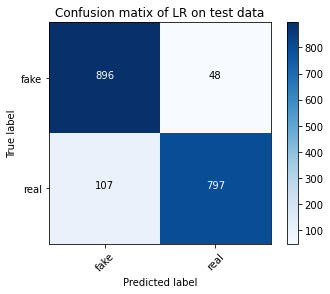

In [13]:
# test set 
# display results
print_metrics(lr_pred_test,y_test)
plot_confusion_matrix(confusion_matrix(y_test,lr_pred_test),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of LR on test data')

## #3 Gradient Boosting

[[874  74]
 [157 768]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       948
           1       0.91      0.83      0.87       925

    accuracy                           0.88      1873
   macro avg       0.88      0.88      0.88      1873
weighted avg       0.88      0.88      0.88      1873

Accuracy :  0.8766684463427656
Precison :  0.8807307339102942
Recall :  0.8766684463427656
F1 :  0.8769787420850363


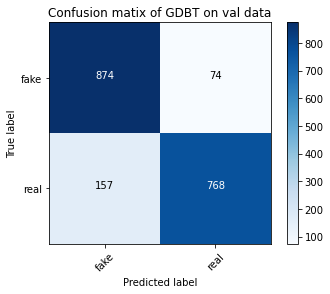

In [14]:
# validation set
# display results
print_metrics(gb_pred_val,y_val)
plot_confusion_matrix(confusion_matrix(y_val,gb_pred_val),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of GDBT on val data')

[[858  86]
 [158 746]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       944
           1       0.90      0.83      0.86       904

    accuracy                           0.87      1848
   macro avg       0.87      0.87      0.87      1848
weighted avg       0.87      0.87      0.87      1848

Accuracy :  0.8679653679653679
Precison :  0.8712255133996548
Recall :  0.8679653679653679
F1 :  0.8682782874356278


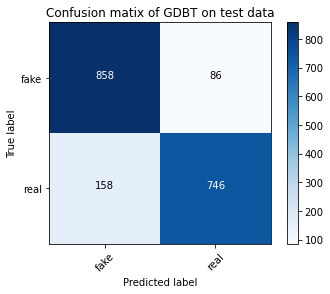

In [15]:
# test set 
# display results
print_metrics(gb_pred_test,y_test)
plot_confusion_matrix(confusion_matrix(y_test,gb_pred_test),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of GDBT on test data')

## #4 Decision Tree

[[802 146]
 [131 794]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       948
           1       0.84      0.86      0.85       925

    accuracy                           0.85      1873
   macro avg       0.85      0.85      0.85      1873
weighted avg       0.85      0.85      0.85      1873

Accuracy :  0.8521089161772557
Precison :  0.8522081165285392
Recall :  0.8521089161772557
F1 :  0.8521038572829482


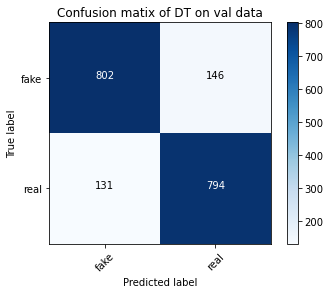

In [16]:
# validation set 
# display results
print_metrics(dt_pred_val,y_val)
plot_confusion_matrix(confusion_matrix(y_val,dt_pred_val),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of DT on val data')

[[817 127]
 [129 775]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       944
           1       0.86      0.86      0.86       904

    accuracy                           0.86      1848
   macro avg       0.86      0.86      0.86      1848
weighted avg       0.86      0.86      0.86      1848

Accuracy :  0.8614718614718615
Precison :  0.8614806982865142
Recall :  0.8614718614718615
F1 :  0.8614752705561121


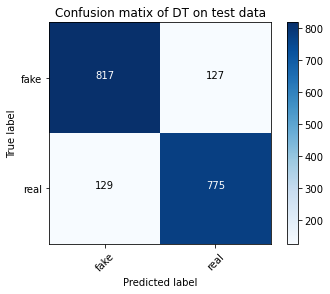

In [17]:
# test set 
# display results
print_metrics(dt_pred_test,y_test)
plot_confusion_matrix(confusion_matrix(y_test,dt_pred_test),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of DT on test data')